In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
sns.set()

In [83]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:320, :8]
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]

In [70]:
ratings = np.loadtxt("musicRatings.csv", delimiter=",")
ratings = pd.DataFrame(ratings[:, :-1])
full_ratings = np.loadtxt("full_ratings.csv", delimiter=",")
full_ratings = full_ratings[:, :320]
full_ratings = pd.DataFrame(full_ratings)
num_song = 139

In [71]:
def AlphaDrop(df):
    alpha_list = []
    for i in df.columns:
        alpha = pg.cronbach_alpha(df.drop(i, axis=1))[0]
        alpha_list.append((i, alpha))
    
    return min(alpha_list, key = lambda t: t[1])

In [72]:
drop_col = []
all_alpha = []

while full_ratings.shape[1] > 139:
    res = AlphaDrop(full_ratings)
    all_alpha.append(res[1])
    full_ratings = full_ratings.drop(res[0], axis=1)
    drop_col.append(res[0])
    print(res)

(260, 0.9847733408577319)
(274, 0.9846839303715981)
(17, 0.9845941094580314)
(164, 0.9845043605686133)
(89, 0.9844139777693598)
(42, 0.9843249528486546)
(28, 0.984235461966345)
(286, 0.9841469869412722)
(270, 0.9840580337803814)
(240, 0.9839686815169469)
(272, 0.9838790442979085)
(287, 0.9837889992774602)
(86, 0.9836985462779027)
(282, 0.9836078196323478)
(78, 0.9835165775610005)
(92, 0.9834243945890538)
(94, 0.9833323315974272)
(284, 0.9832395027016322)
(243, 0.9831461546579421)
(160, 0.9830538214260424)
(230, 0.9829608496481114)
(280, 0.9828673371029383)
(250, 0.9827734359391509)
(66, 0.9826792093799053)
(275, 0.9825840684393063)
(93, 0.9824889805964692)
(281, 0.9823935384921059)
(83, 0.982297910676331)
(261, 0.9822013022795123)
(41, 0.9821043114645462)
(88, 0.9820066517676548)
(79, 0.9819087118524823)
(216, 0.9818101050602381)
(223, 0.9817109811940568)
(87, 0.981610794240533)
(95, 0.981509868261524)
(24, 0.9814085762909734)
(162, 0.9813069592559097)
(30, 0.9812046685345919)
(221, 0.

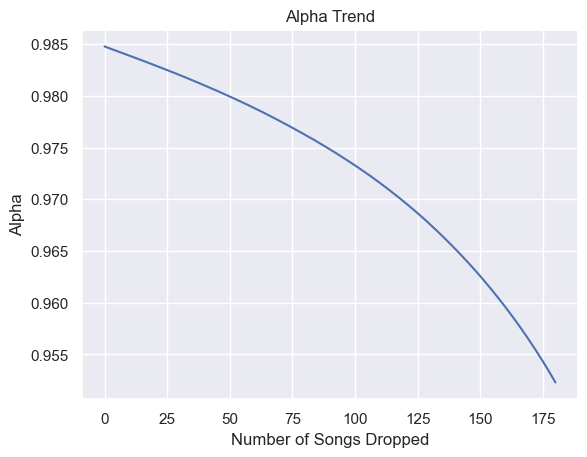

In [82]:
plt.plot(all_alpha)
plt.title("Alpha Trend")
plt.xlabel("Number of Songs Dropped")
plt.ylabel("Alpha")
plt.show()

In [84]:
music_lib.drop(drop_col)

,Source,Number,Title,Artist,Genre,Subgenre/Style,Year,Clip name
4,1,5,Blue Moon of Kentucky,Bill Monroe,2.0,Bluegrass,1947.0,0005_billMonroe_blueMoonOfKentucky.mp4
5,1,6,Blowin' in the Wind,Bob Dylan,2.0,Folk,1963.0,0006_bobDylan_blowinInTheWind.mp4
6,1,7,Folsom Prison Blues,Johnny Cash,2.0,Country Blues,1955.0,0007_johnnyCash_folsomPrisonBlues.mp4
10,1,11,Satisfaction,Benny Benassi,3.0,Techno,2002.0,0011_bennyBenassi_satisfaction.mp4
12,1,13,Feel It All Around,Washed Out,3.0,Downtempo,2009.0,0013_washedOut_feelItAllAround.mp4
...,...,...,...,...,...,...,...,...
315,4,316,Law and Order Theme,Mike Post,9.0,TV,1994.0,0316_lawAndOrderTheme_mikePost.mp4
316,4,317,Star Trek Original Series Theme,Alexander Courage,9.0,TV,1969.0,0317_starTrekTheme_alexandarCourage.mp4
317,4,318,Super Mario Bros World 1-1,Koji Kondo,9.0,Video Game,1985.0,0318_superMarioTheme_kojiKondo.mp4
318,4,319,Tetris,Alexey Pajitnov,9.0,Video Game,1984.0,0319_tetrisTheme_alexeyPajitnov.mp4


In [87]:
impute_full_ratings = np.loadtxt("full_ratings.csv", delimiter=",")[:, 320:999]
impute_full_ratings = pd.DataFrame(impute_full_ratings)

In [88]:
impute_full_ratings

,0,1,2,3,4,5,6,7,8,9,...,669,670,671,672,673,674,675,676,677,678
0,4.000000,5.499393,3.942417,4.302040,4.878687,3.193505,2.649590,4.116324,4.559220,4.219032,...,4.207379,4.061787,3.433096,3.750237,3.554693,3.918780,1.374397,1.000000,3.277149,3.949803
1,2.408878,5.929628,3.708582,4.103778,5.272434,5.000000,2.124711,4.936442,4.572342,3.890290,...,2.000000,3.506520,3.273112,3.641543,3.460135,4.409851,1.469000,2.403966,4.089626,3.445645
2,2.236326,6.198359,5.080276,4.194481,4.996509,2.740513,4.037513,4.000000,6.356754,5.796533,...,4.309281,2.766088,3.874531,3.464702,5.159568,5.200084,1.458346,2.000000,3.164330,3.920557
3,4.919019,6.801959,5.809676,5.448140,6.215622,4.638566,5.309364,6.415455,6.896128,6.338930,...,5.731316,4.852180,5.210575,5.109574,6.118589,5.932988,4.198068,4.065134,5.359803,5.417449
4,3.247323,5.495581,3.928796,4.158576,4.875475,3.214342,3.208106,4.939196,5.116833,3.871052,...,4.582608,3.215441,4.018122,3.754466,4.285189,4.801399,1.800029,2.782740,4.380296,3.772897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2.052678,4.276381,1.000000,2.623620,1.000000,1.708989,1.621816,3.526622,2.875694,2.991860,...,3.871705,2.625235,2.040844,1.895432,2.585232,2.039314,1.282374,1.766343,2.600550,2.262008
940,4.158072,4.292910,5.000000,5.000000,4.685476,5.385521,4.768907,5.982825,3.559910,4.010226,...,5.151170,3.050080,5.013077,3.896457,3.320158,3.395874,3.717327,5.385717,5.490697,6.000000
941,4.000000,5.137551,4.318224,4.603492,4.576705,2.785556,2.913729,3.785600,4.540346,4.040215,...,4.069405,2.926109,3.507227,3.909308,3.894061,4.000000,1.561053,1.000000,3.733265,4.000000
942,3.777578,3.945910,2.784902,3.513445,1.000000,6.690887,5.600630,6.349280,2.965404,3.968396,...,3.000000,3.132919,5.000000,2.000000,2.459866,2.315477,6.319977,2.882231,5.012665,4.304394


In [90]:
impute_drop_col = []
impute_all_alpha = []

while impute_full_ratings.shape[1] > 30:
    res = AlphaDrop(impute_full_ratings)
    impute_all_alpha.append(res[1])
    impute_full_ratings = impute_full_ratings.drop(res[0], axis=1)
    impute_drop_col.append(res[0])
    print(res)

(634, 0.9983668778859015)
(292, 0.9983621565038024)
(393, 0.9983574185313262)
(454, 0.9983526678690647)
(370, 0.9983479006616289)
(424, 0.998343132502169)
(633, 0.9983383914702586)
(120, 0.9983336495351323)
(285, 0.9983288897169722)
(197, 0.998324199535873)
(480, 0.9983195043319937)
(390, 0.9983148389173755)
(407, 0.9983101549018878)
(182, 0.9983054550001833)
(560, 0.9983007440249714)
(575, 0.9982960327529071)
(570, 0.9982913010977663)
(650, 0.9982865504237087)
(353, 0.9982817975244085)
(176, 0.9982770437052267)
(678, 0.99827227359297)
(336, 0.9982674861918399)
(15, 0.9982627065432359)
(61, 0.9982579095793848)
(84, 0.9982530931337873)
(18, 0.9982482637848977)
(133, 0.998243412551557)
(539, 0.9982385588897659)
(310, 0.998233704368862)
(651, 0.9982288252026734)
(279, 0.9982239256989489)
(515, 0.9982190174189614)
(308, 0.9982140854586352)
(45, 0.9982091363504497)
(80, 0.9982041696826549)
(184, 0.9981991882718165)
(397, 0.9981941945187492)
(387, 0.9981891985772219)
(326, 0.9981841802502092

KeyboardInterrupt: 

In [ ]:
music_lib_dropped = music_lib.drop(impute_drop_col)
music_lib_dropped.to_csv('new_select679_alpha.csv')

In [ ]:
def get_alpha_min(np_mat):
    cov = np.cov(np_mat)
    a_list = []
    for i in range(len(np_mat)):
        tmp = np.delete(np_mat, i, axis=0)
        tmp = np.delete(tmp, i, axis=1)
        leng = len(tmp)
        sum_v = sum([cov[j, j] for j in range(leng)])
        v = sum_v/leng
        c = (sum(tmp) - sum_v)/(leng**2)
        a_list.append(leng*c/(v + (leng-1)*c))
    
    return argmin(a_list), min(a_list)